# Exploring centrality anomaly in transportation networks

## Packages and functions

In [1]:
#sets the notebook width
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:85% !important; }</style>"))

%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
# Standard Library
import os
import time
import math
import subprocess
import random
from operator import itemgetter
from collections import Counter
from random import uniform

#Third Party Libraries
import networkx as nx
import igraph
import pandas as pd
import numpy as np
from scipy import stats
from scipy import optimize
import seaborn as sns
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.ticker as plticker
from matplotlib import ticker
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx

from scipy import stats
from matplotlib.patches import Ellipse
from astroML.stats import fit_bivariate_normal
from astroML.stats.random import bivariate_normal
from scipy.stats import gaussian_kde
from matplotlib import patches
from numpy import linalg
import matplotlib.path as mpath
import  matplotlib.colors  as colors
import matplotlib.cm as cmx
import cartopy.crs as ccrs
import cartopy as cartopy
import cartopy.io.shapereader as shpreader
import cartopy.crs as ccrs
from cartopy.io import shapereader
import geopandas

In [3]:
import sys
import os

src_dir = os.path.abspath(os.path.join(os.pardir, 'python'))
sys.path.append(src_dir)
#Local modules
from functions import *

In [4]:
stdrcparams(usetex=True)
figsizer=stdfigsize()
figsize=(9.1,7)
fig4size=(12.13333333,  9.33333333)

In [5]:
import warnings
warnings.filterwarnings('ignore') 

In [6]:
# pip install watermark

In [7]:
%load_ext watermark
%watermark -n -u -v -iv -w

igraph     0.9.6
pandas     1.1.5
cartopy    0.19.0.post1
seaborn    0.11.2
networkx   2.4
numpy      1.19.5
geopandas  0.9.0
matplotlib 3.0.3
last updated: Wed Apr 06 2022 

CPython 3.6.15
IPython 7.16.1
watermark 2.0.2


# Calculate and save: degree, strength, and betwenness

In [8]:
calculates=False
if calculates==True:
    calculate()

# Load data

In [9]:
df_real=dict()
dfnames=dict()
for Network in ['UK','ES','BR',"AIR"]:
    df_real[Network],dfnames[Network]=load_data_real(Network)

In [10]:
ksample=dict()
ssample=dict()
bsample=dict()
ku=dict()
su=dict()
bu=dict()
for Network in ['UK','ES','BR',"AIR"]:
    ku[Network],su[Network],bu[Network]=ksb_real_data_ubcm(df_real[Network])
    ksample[Network],ssample[Network],bsample[Network]=ksb_load_ubcm_samples(Network)

    #Betweenness centrality normalization
    n=len(ku[Network])
    bsample[Network]=bsample[Network]*2/((n-1)*(n-2))
    bu[Network]=bu[Network]*2/((n-1)*(n-2))
    
    #AIR network degree and strength rescaling
    if Network=='AIR': 
        ku[Network]=ku[Network]
        su[Network]=su[Network]
        ksample[Network]=ksample[Network]
        ssample[Network]=ssample[Network]

In [13]:
wksample=dict()
wssample=dict()
wbsample=dict()
kw=dict()
sw=dict()
bw=dict()
for Network in ['UK','ES','BR',"AIR"]:
    kw[Network],sw[Network],bw[Network]=ksb_real_data_uecm(df_real[Network])
    wksample[Network],wssample[Network],wbsample[Network]=ksb_load_uecm_sample(Network)
    
    #Betweenness centrality normalization
    n=len(kw[Network])
    wbsample[Network]=wbsample[Network]*2/((n-1)*(n-2))
    bw[Network]=bw[Network]*2/((n-1)*(n-2))
    
    #AIR network degree and strength rescaling
    if Network=='AIR': 
        kw[Network]=kw[Network]
        sw[Network]=sw[Network]
        wksample[Network]=wksample[Network]
        wssample[Network]=wssample[Network]

# Networks

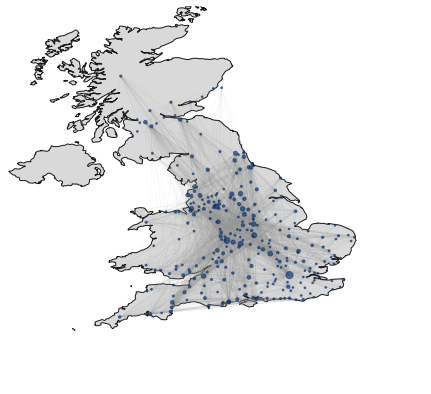

In [14]:
fig, ax = plt.subplots(figsize=figsize)
ax=plot_maps('UK',dfnames['UK'],ax=ax)
plot_network(Network='UK',df_real=df_real,dfnames=dfnames)
plt.savefig("../figures/raw_figures/map_uk.png",dpi=600, bbox_inches='tight')

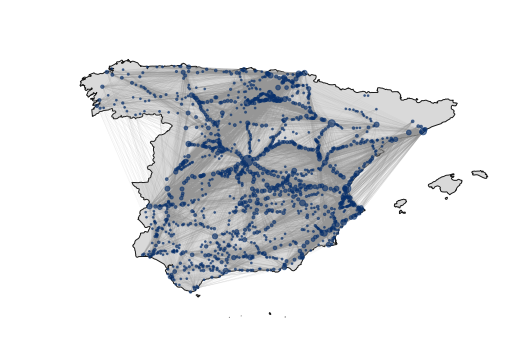

In [15]:
fig, ax = plt.subplots(figsize=figsize)
plot_maps('ES',df=dfnames['ES'],ax=ax)
plot_network(Network='ES',df_real=df_real,dfnames=dfnames)
plt.savefig("../figures/raw_figures/map_spain.png",dpi=600, bbox_inches='tight')

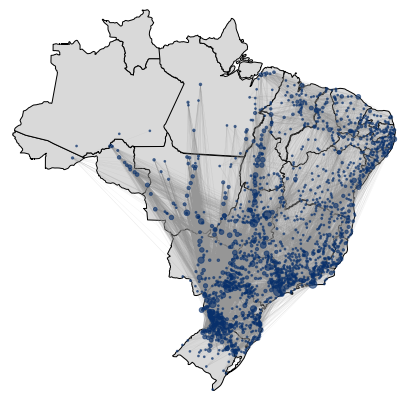

In [16]:
fig, ax = plt.subplots(figsize=(7, 11),subplot_kw=dict(projection=ccrs.PlateCarree()))
plot_maps('BR',df=None,ax=ax)
plot_network(Network='BR',df_real=df_real,dfnames=dfnames)
plt.savefig("../figures/raw_figures/map_br.png",dpi=600, bbox_inches='tight')

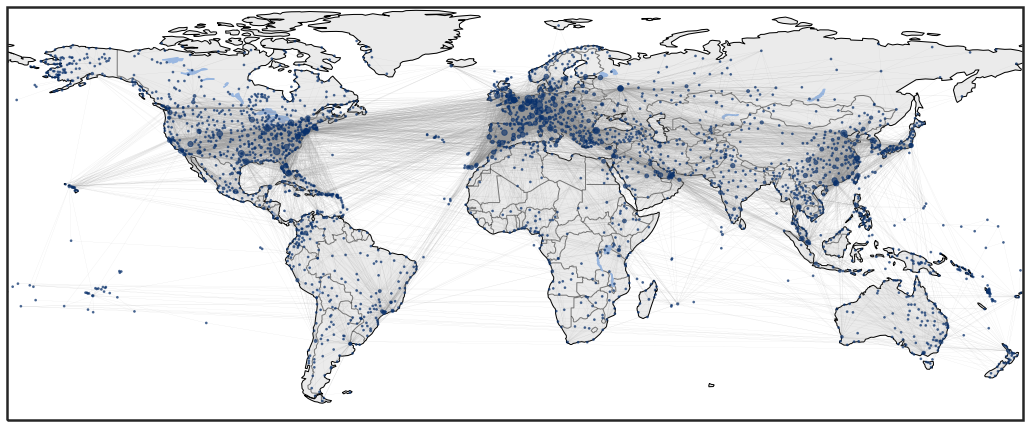

In [15]:
fig= plt.subplots(figsize=(9.1*2, 7*2))
ax = plt.axes(projection=cartopy.crs.PlateCarree())
ax=plot_maps("AIR",df=None,ax=ax)
plot_network(Network='AIR',df_real=df_real,dfnames=dfnames)
# plt.savefig("../figures/raw_figures/map_air.png",dpi=600, bbox_inches='tight')

# Anomaly betwennes centrality vs. degree

In [20]:
for Network in ['BR','UK','ES',"AIR"]:
    df=df_real[Network].copy()
    numberofnodes=len(np.array(list(set(df.Source).union(set(df.Target)))))
    print(Network)
    print("Number of nodes: {}".format(numberofnodes))
    print("Number of edges: {}".format(len(df_real[Network])))
    print('\n')

BR
Number of nodes: 1786
Number of edges: 19060


UK
Number of nodes: 279
Number of edges: 3998


ES
Number of nodes: 1435
Number of edges: 21736


AIR
Number of nodes: 2734
Number of edges: 16665




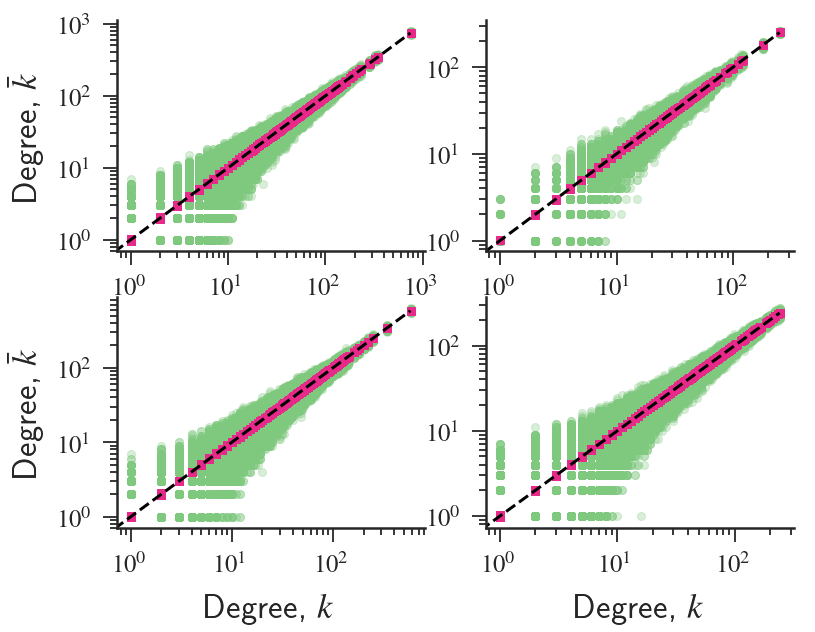

In [21]:
fig = plt.figure(figsize=(fig4size))
for j,Network in enumerate(['BR','UK','ES',"AIR"]):
    ax = fig.add_subplot(2,2,j+1)
    plot_ensemble_check(ku[Network],ksample[Network],ax=ax,samplesize=100)
    #ax.annotate(Network+'- UBCM',xy=(10, max(ku[Network])*0.9),size=25)
    if j==2:
        ax.set_xlabel(r'Degree, $k$')
    if j==3:
        ax.set_xlabel(r'Degree, $k$')
    if j==0:
        ax.set_ylabel(r'Degree, $\bar{k}$')
    if j==2:
        ax.set_ylabel(r'Degree, $\bar{k}$')
    ax.set_xscale('log')
    ax.set_yscale('log')

#plt.tight_layout()
plt.savefig("../figures/raw_figures/degree_ubcm.pdf", bbox_inches='tight')

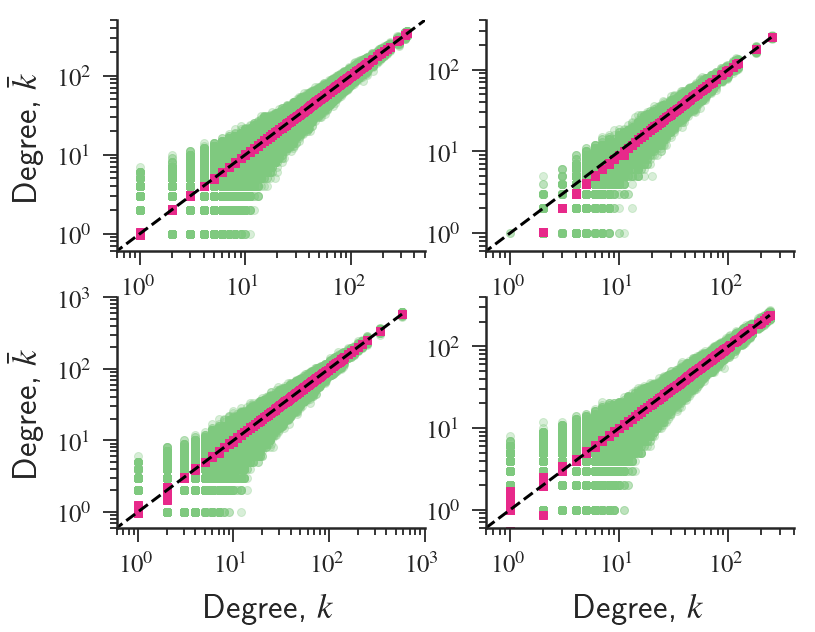

In [22]:
fig = plt.figure(figsize=(fig4size))
for j,Network in enumerate(['BR','UK','ES',"AIR"]):
    ax = fig.add_subplot(2,2,j+1)
    plot_ensemble_check(kw[Network],wksample[Network],ax=ax,samplesize=100)
    #ax.annotate(Network+'- UBCM',xy=(10, max(kw[Network])*0.9),size=25)
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_ylim(0.6,10**3)
    ax.set_xlim(0.6,10**3)
    if j==0:
        ax.set_ylabel(r'Degree, $\bar{k}$')
        ax.set_xlim(0.6,5*10**2)
        ax.set_ylim(0.6,5*10**2)
    if j==1:
        #ax.set_xlabel(r'Degree, $k$')
        ax.set_ylim(0.6,4*10**2)
        ax.set_xlim(0.6,4*10**2)
    if j==2:
        ax.set_ylabel(r'Degree, $\bar{k}$')
        ax.set_xlabel(r'Degree, $k$')
    if j==3:
        ax.set_xlim(0.6,4*10**2)
        ax.set_ylim(0.6,4*10**2)
        ax.set_xlabel(r'Degree, $k$')

# plt.tight_layout()
plt.savefig("../figures/raw_figures/degree_uecm.pdf", bbox_inches='tight')

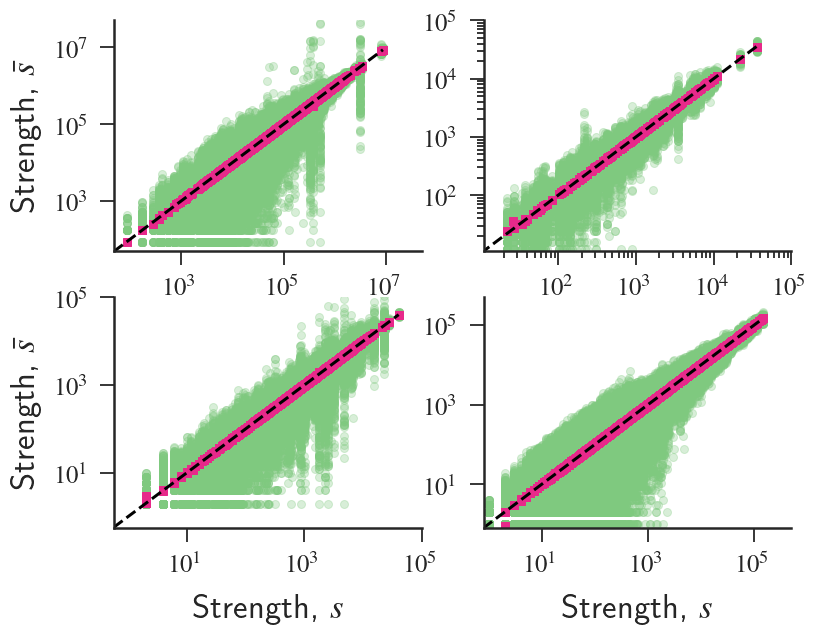

In [23]:
fig = plt.figure(figsize=(fig4size))
maxx=[5*10**7,10**5,10**5,5*10**5]
maxy=[5*10**7,10**5,5*10**5,5*10**5]
minx=[50,11,0,0.8]
miny=[1,0.1,0,0.8]

for j,Network in enumerate(['BR','UK','ES',"AIR"]):
    ax = fig.add_subplot(2,2,j+1)
    plot_ensemble_check(sw[Network],wssample[Network],ax=ax,samplesize=100)
    #ax.annotate(Network+'- UBCM',xy=(10, max(sw[Network])*0.9),size=25)
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_xlim(minx[j],maxx[j])
    ax.set_ylim(minx[j],maxx[j])


    if j==2:
        ax.set_xlabel(r'Strength, $s$')
    if j==3:
        ax.set_xlabel(r'Strength, $s$')
    if j==0:
        ax.set_ylabel(r'Strength, $\bar{s}$')
    if j==2:
        ax.set_ylabel(r'Strength, $\bar{s}$')

# plt.tight_layout()
plt.savefig("../figures/raw_figures/strength_uecm.pdf", bbox_inches='tight')

# Strength vs. degree

In [24]:
labels=[r'\textbf{(a)}',r'\textbf{(b)}',r'\textbf{(c)}',r'\textbf{(d)}']
labels=[r'Bus, Brazil',r'Bus, Great Britain',r'Bus, Spain',r'Air, Worldwide']

def get_axis_limits(ax, xscale=0.05 ,yscale=.85):
    return ax.get_xlim()[1]*xscale, ax.get_ylim()[1]*yscale

BR 0.8808404174829422
UK 0.9088951555724167
ES 0.7249969235796224
AIR 0.8661488494817605


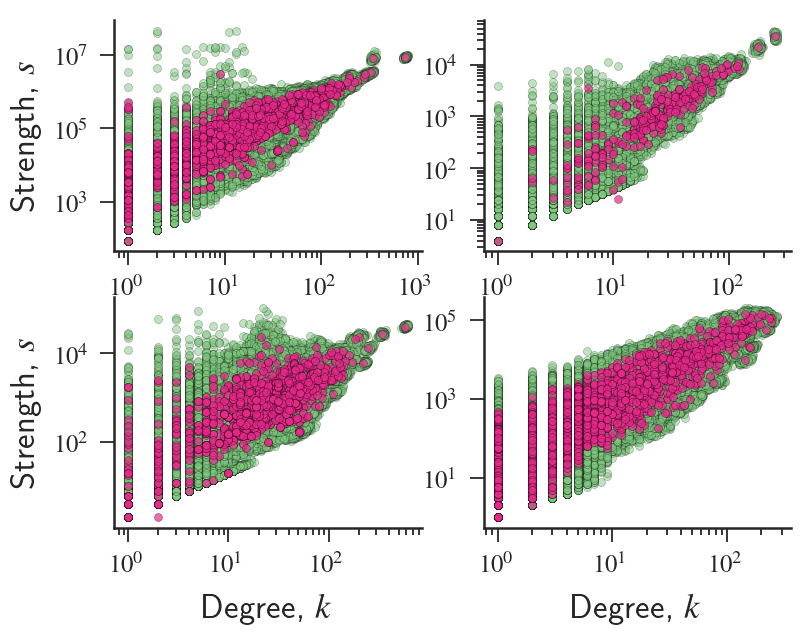

In [25]:
fig = plt.figure(figsize=(fig4size))
for j,Network in enumerate(['BR','UK','ES',"AIR"]):
    ax = fig.add_subplot(2,2,j+1)
    x=[]
    y=[]
    for i in range(0,100):
        x.extend(wksample[Network][i])
        y.extend(wssample[Network][i])
    plt.plot(x,y,'o',
                color='#7fc97f',
                markersize=8,
                alpha=0.5,
                markeredgecolor="k",
                markeredgewidth=0.4,
                rasterized=True,zorder=-1)
    plt.plot(kw[Network],sw[Network],'o',
                color='#e7298a',#'#d95f02',
                markersize=8,
                alpha=0.7,
                markeredgecolor="k",
                markeredgewidth=0.4,
                rasterized=False,zorder=10)
    print(Network,np.corrcoef(kw[Network],sw[Network])[0][1])
    #ax.yaxis.set_major_locator(ticker.MultipleLocator(0.1))
    #if j==1 or j==3:
        #ax.xaxis.set_major_locator(ticker.MultipleLocator(80))
    #if j==3:
        #ax.yaxis.set_major_locator(ticker.MultipleLocator(0.02))
    if j==2:
        ax.set_xlabel(r"Degree, $k$")
    if j==3:
        ax.set_xlabel(r"Degree, $k$")
        #ax.set_ylim(-0.005,0.08)
    if j==0:
        ax.set_ylabel(r"Strength, $s$")
    if j==2:
        ax.set_ylabel(r"Strength, $s$")
    #ax.annotate(labels[j], xy=get_axis_limits(ax),size=25)
#     ax.spines['top'].set_visible(False)
#     ax.spines['right'].set_visible(False)
#     ax.get_xaxis().tick_bottom()
#     ax.get_yaxis().tick_left()
#     ax.tick_params(axis="x",length=7,direction="out",pad=2)
#     ax.tick_params(axis="y",length=7,direction="out",pad=2)
    ax.set_xscale('log')
    ax.set_yscale('log')

# # # plt.tight_layout()
# # # plt.savefig("../figures/raw_figures/bvsk_ubcm.pdf",bbox_inches='tight')

# Betweenness vs. degree and strength

## Non-weighted network 

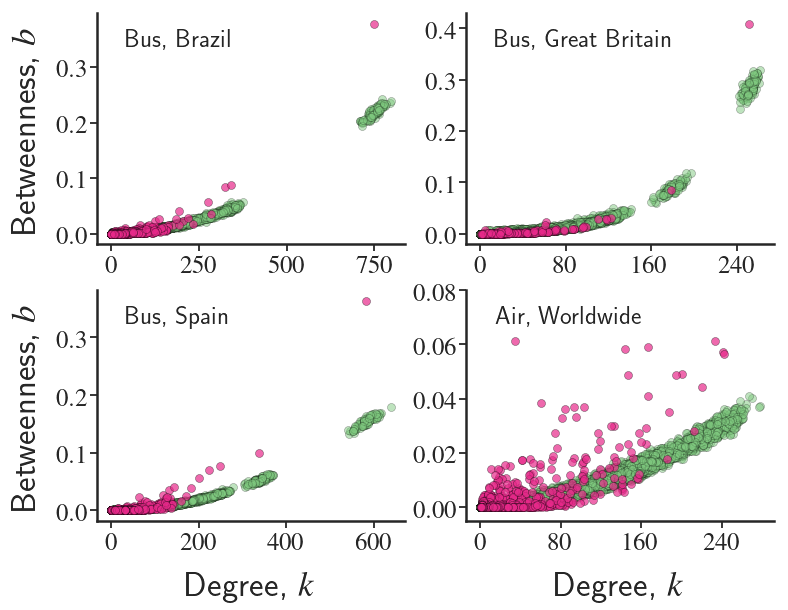

In [26]:
labels=[r'\textbf{(a)}',r'\textbf{(b)}',r'\textbf{(c)}',r'\textbf{(d)}']
labels=[r'Bus, Brazil',r'Bus, Great Britain',r'Bus, Spain',r'Air, Worldwide']

def get_axis_limits(ax, xscale=0.05 ,yscale=.85):
    return ax.get_xlim()[1]*xscale, ax.get_ylim()[1]*yscale

fig = plt.figure(figsize=(fig4size))
for j,Network in enumerate(['BR','UK','ES',"AIR"]):
    ax = fig.add_subplot(2,2,j+1)
    plot_b_vs_k(ku[Network],bu[Network],ssample[Network],bsample[Network],ax,log=False)
#    plot_b_vs_k_density(ku[Network],bu[Network],ksample[Network],bsample[Network],ax,log=False)

    
    #ax.annotate(Network+' transportation network',xy=(min(ku[Network]), max(bu[Network])*0.9),color='b',size=25)
    ax.yaxis.set_major_locator(ticker.MultipleLocator(0.1))
    if j==1 or j==3:
        ax.xaxis.set_major_locator(ticker.MultipleLocator(80))
    if j==3:
        ax.yaxis.set_major_locator(ticker.MultipleLocator(0.02))
    if j==2:
        ax.set_xlabel(r"Degree, $k$")
    if j==3:
        ax.set_xlabel(r"Degree, $k$")
        ax.set_ylim(-0.005,0.08)
    if j==0:
        ax.set_ylabel(r"Betweenness, $b$")
    if j==2:
        ax.set_ylabel(r"Betweenness, $b$")
    ax.annotate(labels[j], xy=get_axis_limits(ax),size=25)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    ax.tick_params(axis="x",length=7,direction="out",pad=2)
    ax.tick_params(axis="y",length=7,direction="out",pad=2)

# plt.tight_layout()
# plt.savefig("../figures/raw_figures/bvsk_ubcm.pdf",bbox_inches='tight')

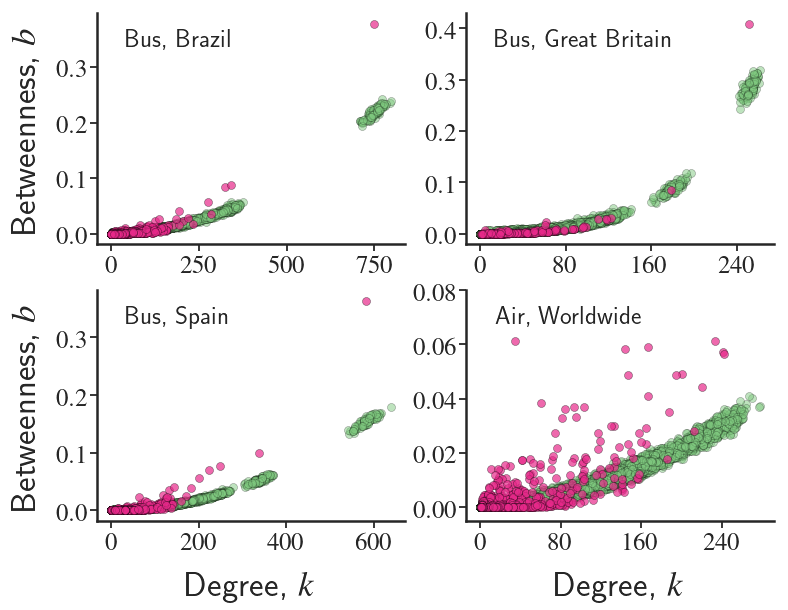

In [27]:
fig = plt.figure(figsize=(fig4size))
for j,Network in enumerate(['BR','UK','ES',"AIR"]):
    ax = fig.add_subplot(2,2,j+1)
    plot_b_vs_k(ku[Network],bu[Network],ksample[Network],bsample[Network],ax,log=False)
#    plot_b_vs_k_density(ku[Network],bu[Network],ksample[Network],bsample[Network],ax,log=False)

    
    #ax.annotate(Network+' transportation network',xy=(min(ku[Network]), max(bu[Network])*0.9),color='b',size=25)
    ax.yaxis.set_major_locator(ticker.MultipleLocator(0.1))
    if j==1 or j==3:
        ax.xaxis.set_major_locator(ticker.MultipleLocator(80))
    if j==3:
        ax.yaxis.set_major_locator(ticker.MultipleLocator(0.02))
    if j==2:
        ax.set_xlabel(r"Degree, $k$")
    if j==3:
        ax.set_xlabel(r"Degree, $k$")
        ax.set_ylim(-0.005,0.08)
    if j==0:
        ax.set_ylabel(r"Betweenness, $b$")
    if j==2:
        ax.set_ylabel(r"Betweenness, $b$")
    ax.annotate(labels[j], xy=get_axis_limits(ax),size=25)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    ax.tick_params(axis="x",length=7,direction="out",pad=2)
    ax.tick_params(axis="y",length=7,direction="out",pad=2)

# plt.tight_layout()
plt.savefig("../figures/raw_figures/bvsk_ubcm.pdf",bbox_inches='tight')

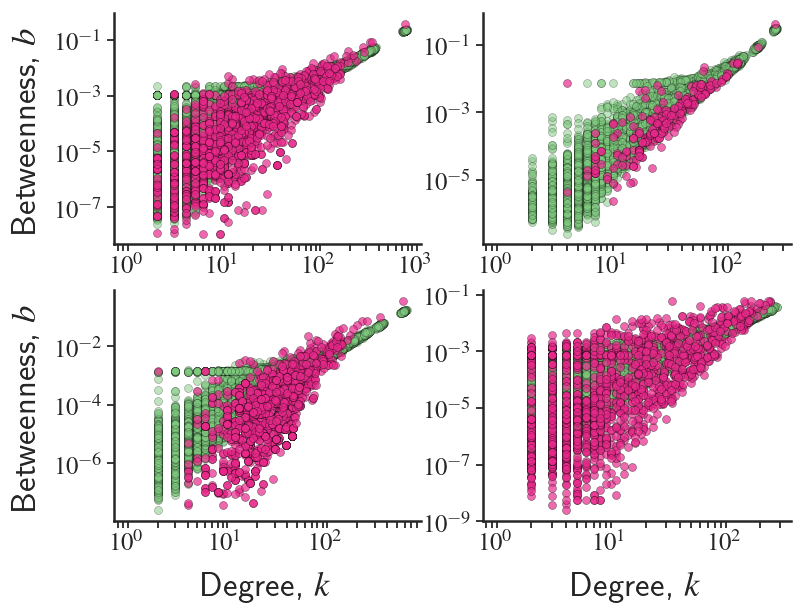

In [28]:
fig = plt.figure(figsize=(fig4size))
for j,Network in enumerate(['BR','UK','ES',"AIR"]):
    ax = fig.add_subplot(2,2,j+1)
    plot_b_vs_k(ku[Network],bu[Network],ksample[Network],bsample[Network],ax,log=True)

    #ax.annotate(Network+' transportation network',xy=(min(ku[Network]), max(bu[Network])*0.6),color='b',size=25)

    if j==2:
        ax.set_xlabel(r"Degree, $k$")
    if j==3:
        ax.set_xlabel(r"Degree, $k$")
    if j==0:
        ax.set_ylabel(r"Betweenness, $b$")
    if j==2:
        ax.set_ylabel(r"Betweenness, $b$")
        
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    ax.tick_params(axis="x",length=7,direction="out",pad=2)
    ax.tick_params(axis="y",length=7,direction="out",pad=2)

# plt.savefig("../figures/raw_figures/bvsk_ubcm_log.pdf", bbox_inches='tight')

## Weighted network

### Degree 

In [29]:
labels=[r'Bus, Brazil',r'Bus, Great Britain',r'Bus, Spain',r'Air, Worldwide']

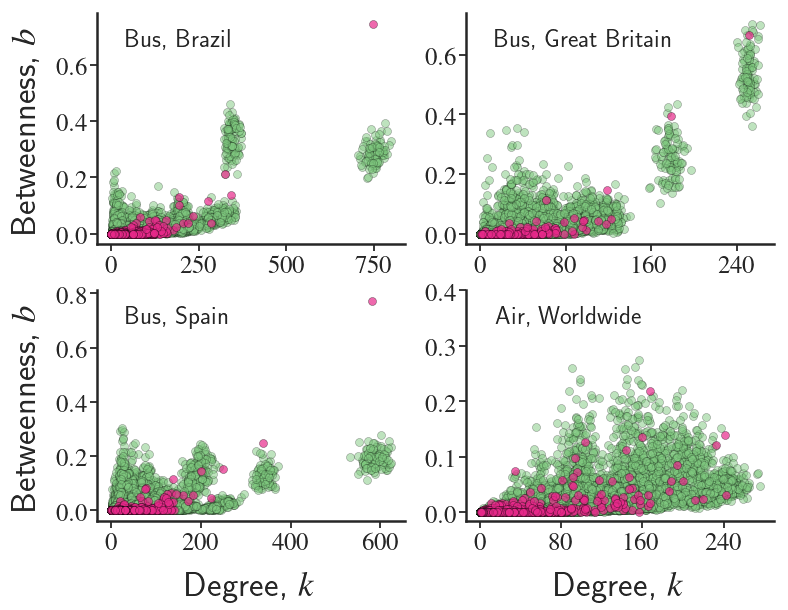

In [30]:
fig = plt.figure(figsize=(fig4size))
for j,Network in enumerate(['BR','UK','ES',"AIR"]):
    ax = fig.add_subplot(2,2,j+1)
    plot_b_vs_k(kw[Network],bw[Network],wksample[Network],wbsample[Network],ax,log=False)

    ax.yaxis.set_major_locator(ticker.MultipleLocator(0.2))
    if j==1 or j==3:
        ax.xaxis.set_major_locator(ticker.MultipleLocator(80))
    if j==3:
        ax.yaxis.set_major_locator(ticker.MultipleLocator(0.1))
    if j==2:
        ax.set_xlabel(r"Degree, $k$")
    if j==3:
        ax.set_xlabel(r"Degree, $k$")
        ax.set_ylim(-0.015,0.4)
    if j==0:
        ax.set_ylabel(r"Betweenness, $b$")
    if j==2:
        ax.set_ylabel(r"Betweenness, $b$")    
    ax.annotate(labels[j], xy=get_axis_limits(ax),size=25)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    ax.tick_params(axis="x",length=7,direction="out",pad=2)
    ax.tick_params(axis="y",length=7,direction="out",pad=2)

#plt.tight_layout()
plt.savefig("../figures/raw_figures/bvsk_uecm.pdf", bbox_inches='tight')

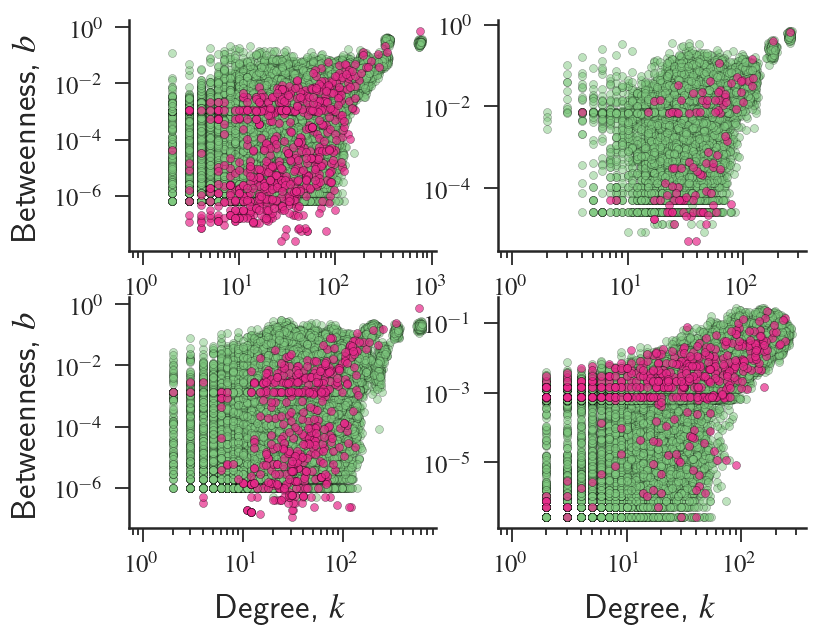

In [31]:
fig = plt.figure(figsize=(fig4size))
for j,Network in enumerate(['BR','UK','ES',"AIR"]):
    ax = fig.add_subplot(2,2,j+1)
    plot_b_vs_k(kw[Network],bw[Network],wksample[Network],wbsample[Network],ax,log=True)

    #ax.annotate(Network+' transportation network',xy=(min(kw[Network]), max(bw[Network])*0.5),color='b',size=25)

    if j==2:
        ax.set_xlabel(r"Degree, $k$")
    if j==3:
        ax.set_xlabel(r"Degree, $k$")
    if j==0:
        ax.set_ylabel(r"Betweenness, $b$")
    if j==2:
        ax.set_ylabel(r"Betweenness, $b$")

# plt.savefig("../figures/raw_figures/bvsk_uecm_log.pdf", bbox_inches='tight')

### Strength 


In [32]:
labels=[r'Bus, Brazil',r'Bus, Great Britain',r'Bus, Spain',r'Air, Worldwide']

In [33]:
def myticks(x):

    if x == 0: return "$0$"

    exponent = int(np.log10(x))
    coeff = x/10**exponent

    return r"${:2.0f} \times 10^{{ {:2d} }}$".format(coeff,exponent)


In [34]:
def winm(x, y, nw):
    xw = []
    yw = []
    step = (max(x) - min(x)) / nw
    lw = [min(x) + step * i for i in range(0, nw)]
    for i in range(0, len(lw) - 1):
        if len(y[x > lw[i]][x[x > lw[i]] < lw[i + 1]]) >10:
            xw.append(np.mean(x[x > lw[i]][x[x > lw[i]] < lw[i + 1]]))
            yw.append(np.mean(y[x > lw[i]][x[x > lw[i]] < lw[i + 1]]))
    return (xw, yw)

def stdm(x,y,nw):
    xw=[]
    yw=[]
    step=(max(x)-min(x))/nw
    lw=[min(x)+step*i for i in range(0,nw)]
    for i in range(0,len(lw)-1):
        if len(y[x>lw[i]][x[x>lw[i]]<lw[i+1]])>10:
            xw.append(np.std(x[x>lw[i]][x[x>lw[i]]<lw[i+1]]))
            yw.append(np.std(y[x>lw[i]][x[x>lw[i]]<lw[i+1]]))
    return(xw,yw)

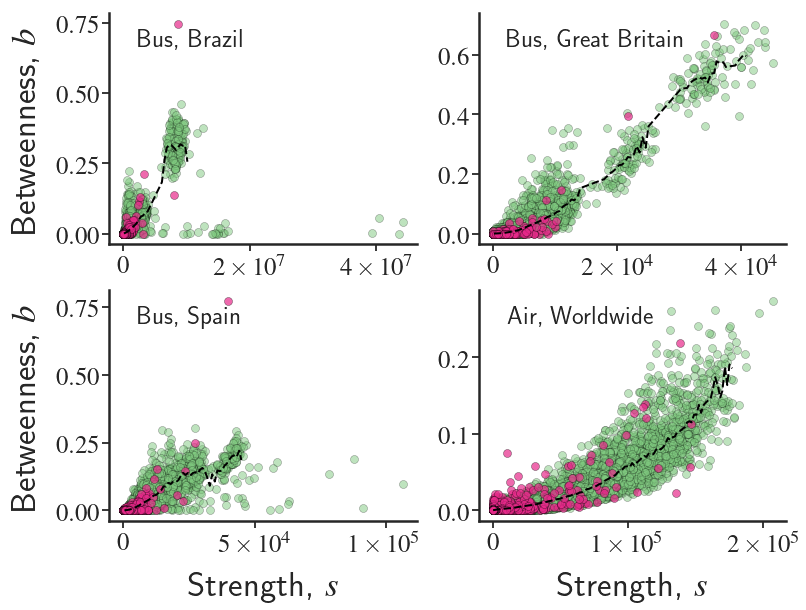

In [35]:
fig = plt.figure(figsize=(fig4size))
for j,Network in enumerate(['BR','UK','ES',"AIR"]):
    ax = fig.add_subplot(2,2,j+1)
    n=len(kw[Network])
    plot_b_vs_s(sw[Network],bw[Network],wssample[Network],wbsample[Network],ax,log=False)
    
    x=[]
    y=[]
    for i in range(0,400):
        x.extend(wssample[Network][i])
        y.extend(wbsample[Network][i])
    xw,yw=winm(np.array(x),np.array(y), nw=120)
    plt.plot(xw,yw,'--',
            color='k',
            linewidth=2,
            zorder=10) 

    if j==2:
        ax.set_xlabel(r"Strength, $s$")
    if j==3:
        ax.set_xlabel(r"Strength, $s$")
    if j==0:
        ax.set_ylabel(r"Betweenness, $b$")
    if j==2:
        ax.set_ylabel(r"Betweenness, $b$")    
    ax.annotate(labels[j], xy=get_axis_limits(ax),size=25)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    ax.tick_params(axis="x",length=7,direction="out",pad=2)
    ax.tick_params(axis="y",length=7,direction="out",pad=2)
    xlabels = ax.get_xticks().tolist()
    
    for i in range(1,len(xlabels)):
        x=xlabels[i]
        xlabels[i]=myticks(x)
    ax.set_xticklabels(xlabels)


# plt.tight_layout()
plt.savefig("../figures/raw_figures/bvss_uecm.pdf", bbox_inches='tight')

# Detecting and quantifying anomalous nodes

- https://www.xarg.org/2018/04/how-to-plot-a-covariance-error-ellipse/


## Non-weighted 

231
The node lies outside the 95% bounds
175
The node does not lie outside the 95% bounds
10
The node lies outside the 95% bounds
903
The node lies outside the 95% bounds


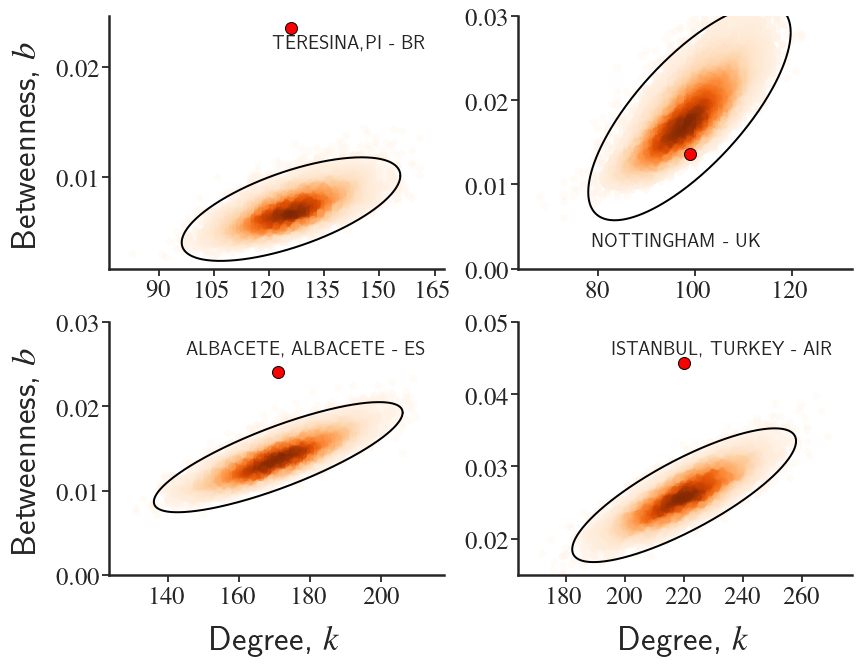

In [70]:
fig = plt.figure(figsize=(fig4size))
for j,Network in enumerate(['BR','UK','ES',"AIR"]):
    ax = fig.add_subplot(2,2,j+1)
    item =[np.where(bu[Network]==item)[0][0] for item in sorted(bu[Network])[-10:]][0]
    print(item)
    plot_95fit_and_city(item,Network,ku[Network],bu[Network],
                           ksample[Network],bsample[Network],
                           dfnames[Network],cmap='Oranges',ax=ax)
    ax.legend(fontsize=20,markerscale=0,frameon=False)
    
    ax.yaxis.set_major_locator(ticker.MultipleLocator(0.01))
    ax.xaxis.set_major_locator(ticker.MultipleLocator(20))
    if j==0:
        ax.xaxis.set_major_locator(ticker.MultipleLocator(15))
    if j==1:
        ax.xaxis.set_major_locator(ticker.MultipleLocator(20))
    if j==3:
        ax.yaxis.set_major_locator(ticker.MultipleLocator(0.01))
        ax.set_ylim(0.015,0.05)

    if j==1 or j==2:
        ax.set_ylim(0,0.03)
    

    if j==2:
        ax.set_xlabel(r"Degree, $k$")
    if j==3:
        ax.set_xlabel(r"Degree, $k$")
    if j==0:
        ax.set_ylabel(r"Betweenness, $b$")
    if j==2:
        ax.set_ylabel(r"Betweenness, $b$")
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    ax.tick_params(axis="x",length=7,direction="out",pad=2)
    ax.tick_params(axis="y",length=7,direction="out",pad=2)
plt.tight_layout()
plt.savefig("../figures/raw_figures/individual_cities_ubcm.pdf", bbox_inches='tight')

## Weighted 

175
The node does not lie outside the 95% bounds
10
The node lies outside the 95% bounds
231
The node does not lie outside the 95% bounds
903
The node does not lie outside the 95% bounds


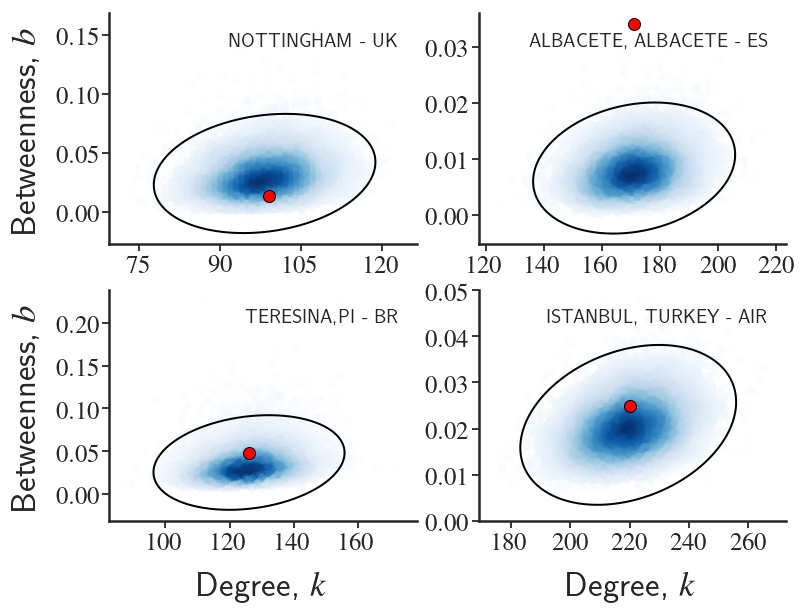

In [71]:
fig = plt.figure(figsize=(fig4size))
for j,Network in enumerate(['UK','ES','BR',"AIR"]):
    ax = fig.add_subplot(2,2,j+1)
    item =[np.where(bu[Network]==item)[0][0] for item in sorted(bu[Network])[-10:]][0]
    print(item)
    plot_95fit_and_city(item,Network,kw[Network],bw[Network],
                           wksample[Network],wbsample[Network],
                           dfnames[Network],cmap='Blues',ax=ax)
    ax.legend(fontsize=20,markerscale=0,frameon=False)
    
    ax.yaxis.set_major_locator(ticker.MultipleLocator(0.05))
    ax.xaxis.set_major_locator(ticker.MultipleLocator(20))
    if j==0:
        ax.xaxis.set_major_locator(ticker.MultipleLocator(15))
    if j==3 or j==1:
        ax.yaxis.set_major_locator(ticker.MultipleLocator(0.01))
    if j==3:
        ax.set_ylim(0,0.05)

    if j==2:
        ax.set_xlabel(r"Degree, $k$")
    if j==3:
        ax.set_xlabel(r"Degree, $k$")
    if j==0:
        ax.set_ylabel(r"Betweenness, $b$")
    if j==2:
        ax.set_ylabel(r"Betweenness, $b$")
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    ax.tick_params(axis="x",length=7,direction="out",pad=2)
    ax.tick_params(axis="y",length=7,direction="out",pad=2)
plt.savefig("../figures/raw_figures/individual_cities_uecm.pdf", bbox_inches='tight')

# Fraction of anomalous nodes

In [48]:
outliers_nonweighted=dict()
outliers_weighted=dict()
for Network in ['UK','ES','BR',"AIR"]:
    outliers_nonweighted[Network]=find_nodes_outside_the_p_bound(ku[Network],
                                                                      bu[Network],
                                                                      ksample[Network],
                                                                      bsample[Network],p=0.95)
    outliers_weighted[Network]=find_nodes_outside_the_p_bound(kw[Network],
                                                          bw[Network],
                                                          wksample[Network],
                                                          wbsample[Network],p=0.95)

In [67]:
for Network in ['UK','ES','BR',"AIR"]:
    print(Network+" transportation network")
    df=dfnames[Network].copy()
    df['b']=bu[Network]
    df['k']=ku[Network]
    df['k_std']=np.std(ksample[Network],axis=0)
    df['brand']=np.mean(bsample[Network],axis=0)
    df['b/brand']=df['b']/df['brand']
    print(df[outliers_nonweighted[Network]==0].sort_values(by='b',ascending=False)[:15]\
          [['city','b','b/brand','k']].reset_index(drop=True))
    print('\n')

UK transportation network
                  city         b     b/brand    k
0               LONDON  0.408812    1.444747  252
1              GLASGOW  0.021606    3.582509   62
2            EDINBURGH  0.017165    2.936568   61
3       SOUTH AYRSHIRE  0.007194  441.698329    4
4             STIRLING  0.006464    9.005789   24
5               DUNDEE  0.004696   10.892864   19
6             HIGHLAND  0.004250    4.867191   26
7        ABERDEEN CITY  0.004232   12.211124   17
8  DUMFRIES & GALLOWAY  0.002564    5.882723   19


ES transportation network
                    city         b    b/brand    k
0         MADRID, MADRID  0.363891   2.362371  582
1     VALENCIA, VALENCIA  0.099529   1.913338  339
2     ZARAGOZA, ZARAGOZA  0.076070   2.653597  249
3   BARCELONA, BARCELONA  0.070606   3.042437  223
4         BURGOS, BURGOS  0.055390   2.917647  201
5         MALAGA, MALAGA  0.041237   4.042584  145
6         MURCIA, MURCIA  0.038156   2.426548  182
7       CORDOBA, CORDOBA  0.035570   4

In [50]:
for Network in ['BR','UK','ES',"AIR"]:
    print(Network+" transportation network")
    df=dfnames[Network].copy()
    df['b']=bw[Network]
    df['k']=kw[Network]
    df['k_std']=np.std(wksample[Network],axis=0)
    df['brand']=np.mean(wbsample[Network],axis=0)
    df['b/brand']=df['b']/df['brand']
    print(df[outliers_nonweighted[Network]==0].sort_values(by='b',ascending=False)[:15]\
          [['city','b','b/brand','k']].reset_index(drop=True))
    print('\n')
    print(df[outliers_weighted[Network]==0].sort_values(by='b',ascending=False)[:15]\
          [['city','b','b/brand','k']].reset_index(drop=True))
    print('\n')

BR transportation network
                     city         b    b/brand    k
0             SAOPAULO,SP  0.745232   2.591345  748
1         RIODEJANEIRO,RJ  0.212253   3.077238  326
2             BRASILIA,DF  0.136334   0.391879  343
3             CURITIBA,PR  0.129029   1.878171  193
4              GOIANIA,GO  0.115921   2.803170  277
5        CAMPINAGRANDE,PB  0.058650  22.648462   84
6             TERESINA,PI  0.048096   1.305873  126
7        FLORIANOPOLIS,SC  0.044131   1.826369  128
8              MARINGA,PR  0.038509   3.119998  206
9   PRESIDENTEPRUDENTE,SP  0.037712   1.634227  220
10           PETROLINA,PE  0.035919  11.209974   71
11              RECIFE,PE  0.029373   4.992842  138
12            LONDRINA,PR  0.026709   2.331600  125
13       RIBEIRAOPRETO,SP  0.023921   0.877444  186
14           FORTALEZA,CE  0.023554   4.357184  108


                     city         b    b/brand    k
0             SAOPAULO,SP  0.745232   2.591345  748
1         RIODEJANEIRO,RJ  0.212253 

[0.0677491601343785, 0.02855543113101904]
[0.03225806451612903, 0.021505376344086023]
[0.10174216027874565, 0.03554006968641115]
[0.12143379663496708, 0.06217995610826628]


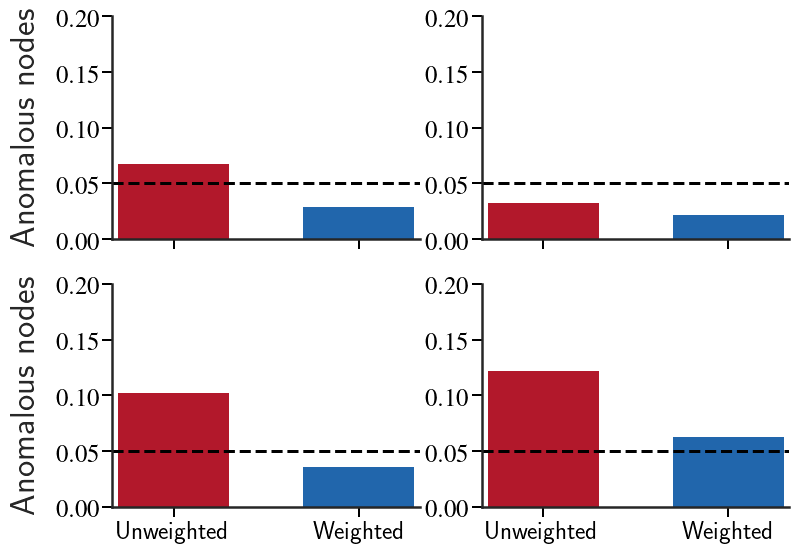

In [51]:
fig = plt.figure(figsize=(fig4size))
for j,Network in enumerate(['BR','UK','ES','AIR']):
    ax = fig.add_subplot(2,2,j+1)

    ax.set_ylim(0,0.2)

    if j==0:
        ax.set_ylabel(r"Anomalous nodes")
        labels=['','']
    if j==1:
        labels=['','']
    if j==2:
        ax.set_ylabel(r"Anomalous nodes")
#         ax.set_xlabel(r"Degree, $k$")
        labels=['Unweighted','Weighted']
    if j==3:
        labels=['Unweighted','Weighted']
#         ax.set_xlabel(r"Degree, $k$")

    ax.axhline(y=0.05,linestyle='--',linewidth=3,color='k')
    bar_plot_outliers(outliers_weighted[Network],outliers_nonweighted[Network],ax,labels=labels)
    ax.tick_params(axis="x",length=10,direction="out",pad=2)
    ax.tick_params(axis="y",length=10,direction="out",pad=2)


#plt.tight_layout()
plt.savefig("../figures/raw_figures/anomalous_nodes.pdf",bbox_inches='tight')

# Strength driven preferential attachment with spatial selection

In [52]:
def rand_prob_node(dni,rc):
    nodes_probs = []
    for node in G.nodes():
        swi = G.degree(node,weight='weight')
        #print(node_degr)
        node_proba = swi*np.exp(-dni[node]/rc)
        #print("Node proba is: {}".format(node_proba))
        nodes_probs.append(node_proba)
        #print("Nodes probablities: {}".format(nodes_probs))
    nodes_probs=np.array(nodes_probs)
    nodes_probs=nodes_probs/np.sum(nodes_probs)
    random_proba_node = np.random.choice(G.nodes(),p=nodes_probs)
    #print("Randomly selected node is: {}".format(random_proba_node))
    return random_proba_node

def add_edge(new_node,dni,w0,rc):
    random_proba_node = rand_prob_node(dni,rc)
    new_edge = (random_proba_node, new_node, w0)
    if G.has_edge(random_proba_node, new_node)==True:
        G[random_proba_node][new_node]['weight']=G[random_proba_node][ new_node]['weight']+w0
    else:
        G.add_weighted_edges_from([(new_node, random_proba_node,w0)])
    return random_proba_node

def update_weights(random_proba_node,delta):
    swi = G.degree(random_proba_node,weight='weight')
    for i in list(dict(G[random_proba_node]).keys()):
        wij=G[random_proba_node][i]['weight']
        G[random_proba_node][i]['weight']=wij+delta*wij/swi

In [53]:
np.random.seed(seed=3)

In [54]:
init_nodes = 5
final_nodes = 100
m = 4
delta=0
w0=1
rc=0.1


distances=np.random.uniform(size=init_nodes) # random positions
dni=dict()
for node in range(0,init_nodes):
    dni[node]=distances[node]
print("Creating initial graph...")

edges=[] # edges
for i in range(0,init_nodes):
    for j in range(0,init_nodes):
        if i > j:
            edges.append((i,j,w0))
G=nx.Graph()
G.add_weighted_edges_from(edges)

print("Graph created. Number of nodes: {}".format(len(G.nodes())))
print("Adding nodes...")

for new_node in range(init_nodes,final_nodes):
    dni[new_node]=np.random.uniform()
    G.add_node(new_node)
    for e in range(0, m):
        random_proba_node=add_edge(new_node,dni,w0=w0,rc=rc)
        update_weights(random_proba_node,delta)

degree=list(dict(nx.degree(G)).values())
strength=np.array(list(dict(nx.degree(G,weight='weight')).values()))
strength=strength.astype(int)
degree.extend(strength)
df=pd.DataFrame(np.transpose([degree]),columns=['k'])
print('../spatial_model/{}_{}_{}_{}_{}_{}.txt'.format(init_nodes,final_nodes,m,delta,w0,rc))
df.to_csv('../spatial_model/{}_{}_{}_{}_{}_{}.txt'.format(init_nodes,final_nodes,m,delta,w0,rc),
      header=None,
     sep='\t',
     index=False)
print('Done')

Creating initial graph...
Graph created. Number of nodes: 5
Adding nodes...
../spatial_model/5_100_4_0_1_0.1.txt
Done


In [55]:
degree=list(dict(nx.degree(G)).values())
strength=np.array(list(dict(nx.degree(G,weight='weight')).values()))
strength=strength.astype(int)
degree.extend(strength)
df=pd.DataFrame(np.transpose([degree]),columns=['k'])
df.to_csv('../spatial_model/w_{}_{}_{}_{}_{}_{}.txt'.format(init_nodes,final_nodes,m,delta,w0,rc),
      header=None,
     sep='\t',
     index=False)
print('Done')

Done


In [56]:
degree=nx.degree(G)
degree=list(dict(degree).values())

strength=nx.degree(G,weight='weight')
strength=np.array(list(dict(nx.degree(G,weight='weight')).values()))

bc=nx.betweenness_centrality(G,weight='weight',normalized=False)
bc=list(dict(bc).values())


In [57]:
def read_ksb_model(method,file):
    k,s,b=np.array(pd.read_csv('../spatial_model/{}_ksb_{}.txt'.format('UBCM','5_100_4_0.9_1_1'),index_col=0).T)
    return k,s,b

In [85]:
result=[]
for i in range(0,100):
    for j in range(0,100):
        for k in range(0,100):
            result.append([i,j,k])

In [86]:
def calculate_kbs_samples(method,file,nodes,n_samples):
    rk=[]
    rb=[]
    rs=[]
    for i in range(1,n_samples+1):
        edges=np.array(pd.read_csv('../spatial_model/{}/{}-{}.txt'.format(method,file,i),header=None).replace(np.nan,0))
        null_model=nx.Graph()   
        null_model.add_nodes_from(nodes)
        null_model.add_weighted_edges_from(edges)
        rdegree=nx.degree(null_model)
        rdegree=list(dict(rdegree).values())

        strength=nx.degree(G,weight='weight')
        strength=list(dict(strength).values())

        rbc=nx.betweenness_centrality(null_model,weight='weight',normalized=False)
        rbc=list(dict(rbc).values())


        rk.append(rdegree)
        rb.append(rbc)
        rs.append(strength)
    pd.DataFrame(rk).to_csv('../spatial_model/{}/k_{}.csv'.format(method,file))
    pd.DataFrame(rs).to_csv('../spatial_model/{}/s_{}.csv'.format(method,file))
    pd.DataFrame(rb).to_csv('../spatial_model/{}/b_{}.csv'.format(method,file))
    return rk,rs,rb


In [87]:
file='5_100_4_10_1_0.1'
nodes=[i for i in range(1,final_nodes)]

In [89]:
rk,rs,rb=calculate_kbs_samples(method='UBCM',file=file,nodes=nodes,n_samples=200)

In [90]:
def read_ksb_samples(method,file):
    rk=np.array(pd.read_csv('../spatial_model/{}_k_{}.csv'.format(method,file),index_col=0))
    rs=np.array(pd.read_csv('../spatial_model/{}_s_{}.csv'.format(method,file),index_col=0))
    rb=np.array(pd.read_csv('../spatial_model/{}_b_{}.csv'.format(method,file),index_col=0))
    return rk,rs,rb

In [92]:
 rk,rs,rb = read_ksb_samples('UECM',file)

In [75]:
fig, ax = plt.subplots(figsize=figsizer)
r=[]
y=[]
for i in range(0,10):
    r.extend(degree)
    y.extend(rk[i])
ax.plot(r,y,
        'o',
        color='#7fc97f',
        markersize=8,
        alpha=0.3,
        rasterized=True)
ax.plot(degree,np.mean(rk,axis=0),
        's',
       color='#e7298a',
       markersize=8)

ax.plot([i for i in range(0,int(max(degree)))],[i for i in range(0,int(max(degree)))],'k--',linewidth=3)

ax.set_xlabel(r'Degree, $k$')

ax.set_ylabel(r'Degree, $\bar{k}$')
ax.set_xscale('log')
ax.set_yscale('log')

In [78]:
fig, ax = plt.subplots(figsize=figsizer)
r=[]
y=[]
for i in range(0,10):
    r.extend(strength)
    y.extend(rs[i])
ax.plot(r,y,
        'o',
        color='#7fc97f',
        markersize=8,
        alpha=0.3,
        rasterized=True)
ax.plot(degree,np.mean(rk,axis=0),
        's',
       color='#e7298a',
       markersize=8)

ax.plot([i for i in range(0,int(max(strength)))],[i for i in range(0,int(max(strength)))],'k--',linewidth=3)

ax.set_xlabel(r'Strength, $s$')

ax.set_ylabel(r'Strength, $\bar{s}$')
ax.set_xscale('log')
ax.set_yscale('log')

In [79]:
fig, ax = plt.subplots(figsize=figsizer)

ax.plot(degree,bc,'o',
    color='#e7298a',
    markersize=5,
    alpha=0.7,
    markeredgecolor="k",
    markeredgewidth=1,
    rasterized=False,zorder=10)

ax.plot(rk,rb,'o',
        color='#7fc97f',
        markersize=5,
        alpha=0.5,
        markeredgecolor="k",
        markeredgewidth=1,
        rasterized=True,zorder=-1)

# ax.set_xscale('log')
# ax.set_yscale('log')

ax.set_xlabel(r"Degree, $k$")
ax.set_ylabel(r"Betweenness, $b$")

()

In [16]:
fig, ax = plt.subplots(figsize=figsizer)

ax.plot(strength,bc,'o',
    color='#e7298a',
    markersize=20,
    alpha=0.7,
    markeredgecolor="k",
    markeredgewidth=1,
    rasterized=False,zorder=10)

ax.plot(rs,rb,'o',
        color='#7fc97f',
        markersize=5,
        alpha=0.5,
        markeredgecolor="k",
        markeredgewidth=1,
        rasterized=True,zorder=-1)

# ax.set_xscale('log')
# ax.set_yscale('log')

ax.set_xlabel(r"Strength, $s$")
ax.set_ylabel(r"Betweenness, $b$")

In [17]:
out=find_nodes_outside_the_p_bound(degree,
                                          bc,
                                          rk,
                                          rb,p=0.95)


len(out[out<1])/len(out)

## Map 

In [80]:
results_ubcm=pd.read_csv('../spatial_model/UBCM/results_ubcm.csv',index_col=0)
results_ubcm.sort_values(by='rc')

,delta,rc,fraction
0,0.01,0.01,0.04
1,1.00,0.01,0.95
2,10.00,0.01,0.69
3,0.01,1.00,0.01
4,1.00,1.00,0.01
5,10.00,1.00,0.01
6,0.01,10.00,0.01
7,1.00,10.00,0.01
8,10.00,10.00,0.01


In [81]:
results_uecm=pd.read_csv('../spatial_model/UECM/results_uecm.csv',index_col=0)
results_uecm.sort_values(by='rc')

,delta,rc,fraction
0,0.01,0.01,0.04
1,1.00,0.01,0.74
2,10.00,0.01,0.35
3,0.01,1.00,0.01
4,1.00,1.00,0.04
5,10.00,1.00,0.07
6,0.01,10.00,0.03
7,1.00,10.00,0.02
8,10.00,10.00,0.05
